**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



**Set global variables**

In [2]:
TXT_ASSAY = "CRISPRi_FlowFISH_K562_Riley_JinWoo"

## Import data

In [3]:
### set directory
txt_assay  = TXT_ASSAY
txt_folder = "guide_scores"
txt_fdiry  = file.path(FD_RES, "assay_fcc", txt_assay, txt_folder)
txt_fname  = "CRISPRi_HCRFF_K562.hg38.ZScore.unstranded.bed.gz"
txt_fpath = file.path(txt_fdiry, txt_fname)

### read table
vec_txt_cname = c("Chrom", "ChromStart", "ChromEnd", "Name", "Score", "Strand", "Target")
dat = read_tsv(
    txt_fpath, 
    col_names = vec_txt_cname, 
    show_col_types = FALSE)

### assign and show
dat_guide_score_chcrff = dat
fun_display_table(head(dat))

Chrom,ChromStart,ChromEnd,Name,Score,Strand,Target
chr1,74582275,74582276,id-1,0.414014,.,CD164
chr1,74582275,74582276,id-1,-0.493091,.,MYC
chr1,74582275,74582276,id-1,0.024514,.,NMU
chr1,74582275,74582276,id-1,0.440890,.,PVT1
chr1,74582309,74582310,id-2,-0.181799,.,CD164
chr1,74582309,74582310,id-2,0.997649,.,MYC


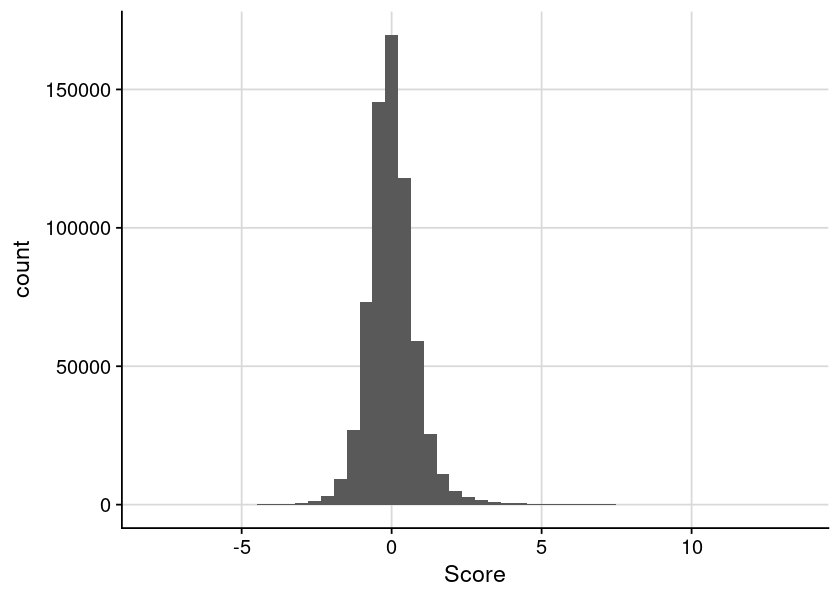

In [8]:
dat = dat_guide_score_chcrff
gpt = ggplot(dat, aes(x=Score)) + 
    geom_histogram(bins=50) +
    theme_cowplot() +
    background_grid()

options(repr.plot.height=5, repr.plot.width=7)
print(gpt)

In [16]:
theme_text = theme(axis.text.x = element_text(angle=90, vjust=0.5, hjust=1))

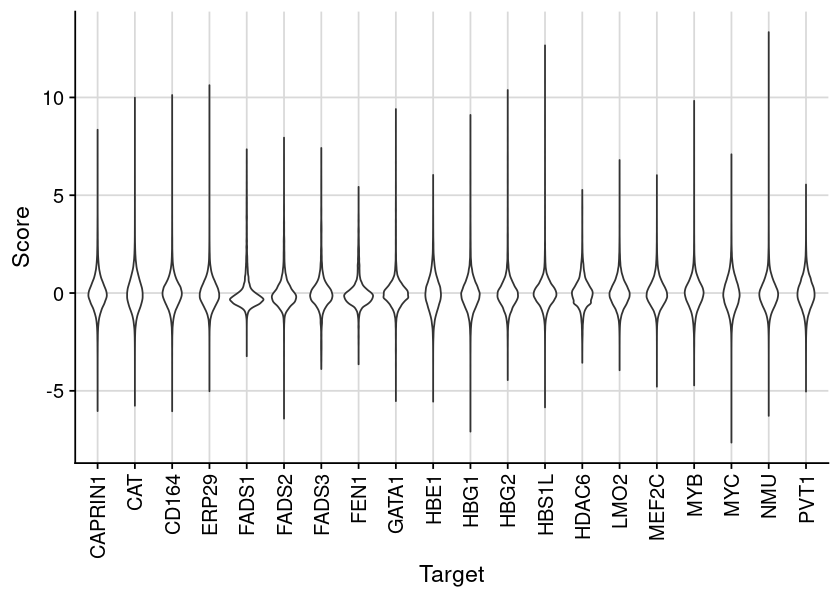

In [18]:
dat = dat_guide_score_chcrff
gpt = ggplot(dat, aes(x=Target, y=Score)) + 
    geom_violin() +
    theme_cowplot() +
    background_grid() +
    theme_text

options(repr.plot.height=5, repr.plot.width=7)
print(gpt)

In [22]:
txt_fdiry = file.path(FD_DAT, "processed", "CRISPRi_FlowFISH_K562_Riley_JinWoo", "track_bedgraph")
vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

CAPRIN1_HCRFF_r1.log2FC_Z.bedgraph 
CAPRIN1_HCRFF_r2.log2FC_Z.bedgraph 
CAPRIN1_HS_exp_r1.tsv 
CAPRIN1_HS_exp_r1.tsv.gz 
CAPRIN1_HS_exp_r2.tsv.gz 
CAPRIN1_LS_exp_r1.tsv.gz 
CAPRIN1_LS_exp_r2.tsv.gz 
CAT_HCRFF_r1.log2FC_Z.bedgraph 
CAT_HCRFF_r2.log2FC_Z.bedgraph 
CAT_HS_exp_r1.tsv 
CAT_HS_exp_r1.tsv.gz 
CAT_HS_exp_r2.tsv.gz 
CAT_LS_exp_r1.tsv.gz 
CAT_LS_exp_r2.tsv.gz 
CD164_HCRFF_r1.log2FC_Z.bedgraph 
CD164_HCRFF_r2.log2FC_Z.bedgraph 
CD164_HS_exp_r1.tsv 
CD164_HS_exp_r1.tsv.gz 
CD164_HS_exp_r2.tsv.gz 
CD164_LS_exp_r1.tsv.gz 
CD164_LS_exp_r2.tsv.gz 
ERP29_HCRFF_r1.log2FC_Z.bedgraph 
ERP29_HCRFF_r2.log2FC_Z.bedgraph 
ERP29_HS_exp_r1.tsv 
ERP29_HS_exp_r1.tsv.gz 
ERP29_HS_exp_r2.tsv.gz 
ERP29_LS_exp_r1.tsv.gz 
ERP29_LS_exp_r2.tsv.gz 
FADS1_HCRFF_r1.log2FC_Z.bedgraph 
FADS1_HCRFF_r2.log2FC_Z.bedgraph 
FADS1_HS_exp_r1.tsv 
FADS1_HS_exp_r1.tsv.gz 
FADS1_HS_exp_r2.tsv.gz 
FADS1_LS_exp_r1.tsv.gz 
FADS1_LS_exp_r2.tsv.gz 
FADS2_HCRFF_r1.log2FC_Z.bedgraph 
FADS2_HCRFF_r2.log2FC_Z.bedgraph 
FADS2_H

In [ ]:
### read data
    cnames = c("Chrom", "Start", "End", "Name", "SeqCounts", "Strand", "Guide_ID", 
           "Chrom_TSS", "Start_TSS", "End_TSS", "Strand_Gene", 
           "Gene_Symbol", 
           "Gene_ENS", 
           "Guide_SpacerSeq",
           "Guide_Seq",
           "Guide_Type",
           "Notes"
          )

In [ ]:
txt_fdiry = file.path(FD_DAT, "processed", "CRISPRi_FlowFISH_K562_Riley_JinWoo", "track_bedgraph")
txt_fname = "*HS_exp_r1.tsv.gz"
txt_fglob = file.path(txt_fdiry, txt_fname)

vec_txt_fpath = Sys.glob(txt_fglob)

###
lst = lapply(vec_txt_fpath, function(txt_fpath){
    dat = read_tsv(txt_fpath, col_names = FALSE, show_col_types = FALSE)
    return(dat)
})

In [ ]:
GATA1_HS_exp_r1.tsv.gz 
GATA1_HS_exp_r2.tsv.gz 
GATA1_LS_exp_r1.tsv.gz 
GATA1_LS_exp_r2.tsv.gz

In [26]:
txt_fdiry = file.path(FD_DAT, "processed", "CRISPRi_FlowFISH_K562_Riley_JinWoo", "track_bedgraph")
txt_fname = "*HS_exp_r1.tsv.gz"
txt_fglob = file.path(txt_fdiry, txt_fname)

vec_txt_fpath = Sys.glob(txt_fglob)

In [32]:
txt_fdiry = file.path(FD_DAT, "processed", "CRISPRi_FlowFISH_K562_Riley_JinWoo", "track_bedgraph")
vec_txt_fname = c(
    "GATA1_HS_exp_r1.tsv.gz",
    "GATA1_HS_exp_r2.tsv.gz",
    "GATA1_LS_exp_r1.tsv.gz",
    "GATA1_LS_exp_r2.tsv.gz")
vec_txt_fpath = file.path(
    txt_fdiry, 
    vec_txt_fname)

vec_txt_cname = c(
    "Chrom", "ChromStart", "ChromEnd", "Name", "SeqCounts", "Strand", "Guide_ID", 
    "Chrom_TSS", "ChromStart_TSS", "ChromEnd_TSS", "Strand_Gene", 
    "Gene_Symbol", 
    "Gene_Ensembl", 
    "Guide_SpacerSeq",
    "Guide_Seq",
    "Guide_Type",
    "Notes")
vec_col_ctype = cols(
    "Chrom"      = col_character(),
    "ChromStart" = col_integer(),
    "ChromEnd"   = col_integer()
)

lst = lapply(vec_txt_fpath, function(txt_fpath){
    ### read data
    dat = read_tsv(
        txt_fpath, 
        col_names = vec_txt_cname, 
        col_types = vec_col_ctype, 
        show_col_types = FALSE)
    return(dat)
})

In [40]:
dat = bind_rows(lst)
print(nrow(dat))

dat = dat %>% dplyr::select(
    Chrom, ChromStart, ChromEnd, Name, Guide_ID, Strand,
    Gene_Symbol, 
    Gene_Ensembl,
    Guide_SpacerSeq,
    Guide_Seq, 
    Guide_Type)
dat = dat %>% dplyr::distinct()
print(nrow(dat))
print(nrow(dat)*4)

[1] 61340
[1] 15335
[1] 61340


## Summary

In [18]:
###
dat = dat_guide_score_chcrff
dat = dat %>% 
    dplyr::select(Chrom, ChromStart, ChromEnd) %>% 
    dplyr::distinct()
dat_loc_total = dat


Chrom,ChromStart,ChromEnd
<chr>,<dbl>,<dbl>
chr1,74582275,74582276
chr1,74582309,74582310
chr1,80526338,80526339
chr1,102025739,102025740
chr1,102026463,102026464
chr1,102522706,102522707


In [20]:
### Total number of guides
grg = grg_guide_total
cat("#{Guides}    =", length(grg), "\n")

### Total locations
dat = dat_loc_chcrff
cat("#{Locations} =", nrow(dat), "\n")

#{Guides}    = 656178 
#{Locations} = 344091 


In [35]:
dat = lst[[1]]
dat = dat %>% dplyr::filter(Notes == "NT")
head(dat)

Chrom,ChromStart,ChromEnd,Name,SeqCounts,Strand,Guide_ID,Chrom_TSS,ChromStart_TSS,ChromEnd_TSS,Strand_Gene,Gene_Symbol,Gene_Ensembl,Guide_SpacerSeq,Guide_Seq,Guide_Type,Notes
<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NA,NA,NA,NA|nt_1006,782,NA,nt_1006,chrX,48786590,48786591,+,GATA1,ENSG00000102145,GACGCGCTGCATACGATCG,GACGCGCTGCATACGATCG,negative_control,NT
NA,NA,NA,NA|nt_1007,329,NA,nt_1007,chrX,48786590,48786591,+,GATA1,ENSG00000102145,GACGGCATGACGAGGTAGT,GACGGCATGACGAGGTAGT,negative_control,NT
NA,NA,NA,NA|nt_1008,654,NA,nt_1008,chrX,48786590,48786591,+,GATA1,ENSG00000102145,GACGGGATCTGATGGTTCA,GACGGGATCTGATGGTTCA,negative_control,NT
NA,NA,NA,NA|nt_1010,413,NA,nt_1010,chrX,48786590,48786591,+,GATA1,ENSG00000102145,GACGGGCTATAAAGCATTT,GACGGGCTATAAAGCATTT,negative_control,NT
NA,NA,NA,NA|nt_1011,167,NA,nt_1011,chrX,48786590,48786591,+,GATA1,ENSG00000102145,GACGTGGACGTTGGCGCC,GACGTGGACGTTGGCGCC,negative_control,NT
NA,NA,NA,NA|nt_1012,491,NA,nt_1012,chrX,48786590,48786591,+,GATA1,ENSG00000102145,GACTAAGCGCAAGCACCT,GACTAAGCGCAAGCACCT,negative_control,NT


In [33]:
dat = lst[[1]]
head(dat)

Chrom,ChromStart,ChromEnd,Name,SeqCounts,Strand,Guide_ID,Chrom_TSS,ChromStart_TSS,ChromEnd_TSS,Strand_Gene,Gene_Symbol,Gene_Ensembl,Guide_SpacerSeq,Guide_Seq,Guide_Type,Notes
<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr12,54300767,54300770,GATA1|chr12:54300749-54300767:+,517,+,chr12:54300749-54300767:+,chrX,48786590,48786591,+,GATA1,ENSG00000102145,GGATTCCAGTGAGATCCGAG,GGATTCCAGTGAGATCCGAG,targeting,NA
chr12,54300811,54300814,GATA1|chr12:54300793-54300811:+,376,+,chr12:54300793-54300811:+,chrX,48786590,48786591,+,GATA1,ENSG00000102145,CTCCACCACAGGTGCCTGAA,GCTCCACCACAGGTGCCTGAA,targeting,NA
chr12,54300999,54301002,GATA1|chr12:54300981-54300999:+,780,+,chr12:54300981-54300999:+,chrX,48786590,48786591,+,GATA1,ENSG00000102145,TGAGCACAGGAGCCCCAAGC,GTGAGCACAGGAGCCCCAAGC,targeting,NA
chr12,54301042,54301045,GATA1|chr12:54301024-54301042:+,327,+,chr12:54301024-54301042:+,chrX,48786590,48786591,+,GATA1,ENSG00000102145,GGACTGAGAACTCAGGCCGA,GGACTGAGAACTCAGGCCGA,targeting,NA
chr19,12887111,12887114,GATA1|chr19:12887092-12887111:+,541,+,chr19:12887092-12887111:+,chrX,48786590,48786591,+,GATA1,ENSG00000102145,CATCAGCACACTGACCGCCC,GCATCAGCACACTGACCGCCC,targeting,NA
chr19,12887179,12887182,GATA1|chr19:12887160-12887179:+,838,+,chr19:12887160-12887179:+,chrX,48786590,48786591,+,GATA1,ENSG00000102145,AAGAGGAGGCTTGAGGCCCA,GAAGAGGAGGCTTGAGGCCCA,targeting,NA


In [30]:
dat = lst[[2]]
head(dat)

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr12,54300767,54300770,GATA1|chr12:54300749-54300767:+,591,+,chr12:54300749-54300767:+,chrX,48786590,48786591,+,GATA1,ENSG00000102145,GGATTCCAGTGAGATCCGAG,GGATTCCAGTGAGATCCGAG,targeting,NA
chr12,54300811,54300814,GATA1|chr12:54300793-54300811:+,499,+,chr12:54300793-54300811:+,chrX,48786590,48786591,+,GATA1,ENSG00000102145,CTCCACCACAGGTGCCTGAA,GCTCCACCACAGGTGCCTGAA,targeting,NA
chr12,54300999,54301002,GATA1|chr12:54300981-54300999:+,501,+,chr12:54300981-54300999:+,chrX,48786590,48786591,+,GATA1,ENSG00000102145,TGAGCACAGGAGCCCCAAGC,GTGAGCACAGGAGCCCCAAGC,targeting,NA
chr12,54301042,54301045,GATA1|chr12:54301024-54301042:+,148,+,chr12:54301024-54301042:+,chrX,48786590,48786591,+,GATA1,ENSG00000102145,GGACTGAGAACTCAGGCCGA,GGACTGAGAACTCAGGCCGA,targeting,NA
chr19,12887111,12887114,GATA1|chr19:12887092-12887111:+,794,+,chr19:12887092-12887111:+,chrX,48786590,48786591,+,GATA1,ENSG00000102145,CATCAGCACACTGACCGCCC,GCATCAGCACACTGACCGCCC,targeting,NA
chr19,12887179,12887182,GATA1|chr19:12887160-12887179:+,711,+,chr19:12887160-12887179:+,chrX,48786590,48786591,+,GATA1,ENSG00000102145,AAGAGGAGGCTTGAGGCCCA,GAAGAGGAGGCTTGAGGCCCA,targeting,NA


In [ ]:
### set file path
fdiry = file.path(FD_RES, "source", "CRISPRi_FlowFISH", "track_bedgraph")
fname = paste(gene, "HS_exp_r1.tsv.gz", sep="_")
fpath = file.path(fdiry, fname)

### read data
cnames = c("Chrom", "Start", "End", "Name", "SeqCounts", "Strand", "Guide_ID", 
       "Chrom_TSS", "Start_TSS", "End_TSS", "Strand_Gene", 
       "Gene_Symbol", 
       "Gene_ENS", 
       "Guide_SpacerSeq",
       "Guide_Seq",
       "Guide_Type",
       "Notes"
      )
ctypes = cols(
    "Chrom" = col_character(),
    "Start" = col_integer(),
    "End"   = col_integer()
)
dat = read_tsv(fpath, col_names = cnames, col_types = ctypes, show_col_types = FALSE)

### assign and show
dat_crispr_info_HS = dat
print(dim(dat))
head(dat)

In [ ]:
fdiry = file.path(FD_RES, "source", "CRISPRi_FlowFISH", "track_bedgraph")

lst = lapply(genes, function(gene){
    
    ###
    fname = paste(gene, "HS_exp_r1.tsv.gz", sep="_")
    fpath = file.path(fdiry, fname)
    
    ### read data
    cnames = c("Chrom", "Start", "End", "Name", "SeqCounts", "Strand", "Guide_ID", 
           "Chrom_TSS", "Start_TSS", "End_TSS", "Strand_Gene", 
           "Gene_Symbol", 
           "Gene_ENS", 
           "Guide_SpacerSeq",
           "Guide_Seq",
           "Guide_Type",
           "Notes"
          )
    ctypes = cols(
        "Chrom" = col_character(),
        "Start" = col_integer(),
        "End"   = col_integer()
    )
    dat = read_tsv(fpath, col_names = cnames, col_types = ctypes, show_col_types = FALSE)
    return(dat)
})
names(lst) = genes

lst_crispr_info = lst
for (idx in names(lst)){
    dat = lst[[idx]]
    txt = format(idx, width = 7, justify = "left")
    cat(txt, dim(dat), "\n")
}